Анализ главных компонент и кластерный анализ

In [ ]:
# подключим библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [6]:
df = sns.load_dataset("iris") #pd.DataFrame(sklearn.datasets.load_iris)

In [11]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
df["species"] = LabelEncoder().fit_transform(df["species"])
df.head()
# другой способ pd.factorize()
#df['species'] = pd.factorize(df['species'])[0]
#df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


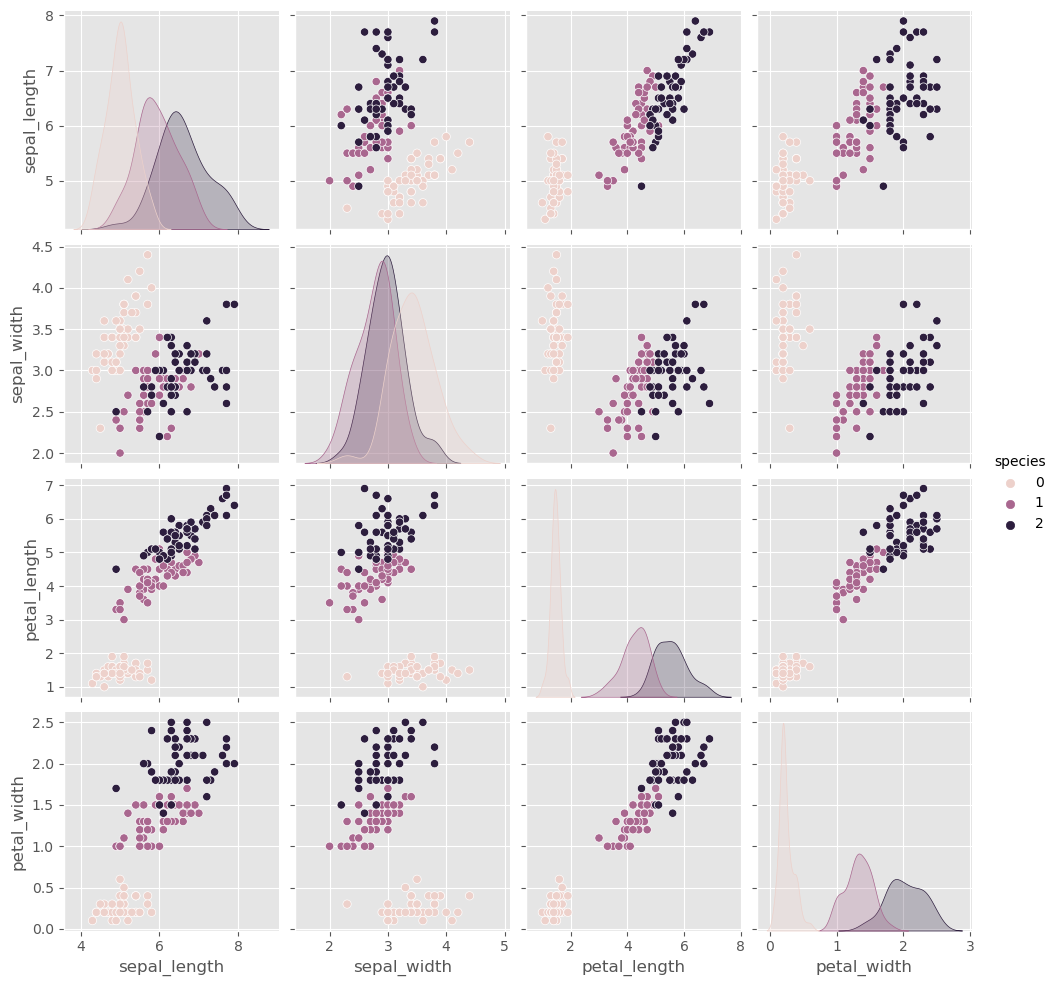

In [13]:
sns.pairplot(df, hue="species")

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [15]:
#далим из датафрейма целевой столбец
df.drop("species", axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
#присваиваем у значения
scal_data, y = StandardScaler().fit_transform(df.drop("species", axis=1)), df["species"]
scal_data

Метод главных компонент

Метод главных компонент (Principal Component Analysis) — один из самых интуитивно простых и часто используемых методов для снижения размерности данных и проекции их на ортогональное подпространство признаков.

Существует несколько эквивалентных математических формулировок метода главных компонент. Основная идея заключается в нахождении таких попарно ортогональных направлений в исходном многомерном пространстве, вдоль которых данные имеют наибольший разброс (выборочную дисперсию). Эти направления называются главными компонентами. Метод главных компонент (Principal Components Analysis) основан на определении минимального числа факторов, вносящих наибольший вклад в дисперсию данных. Это один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

In [18]:
pca = PCA(n_components=2)

In [20]:
data_pca2D = pca.fit_transform(scal_data)

In [22]:
pca.explained_variance_ratio_*100

array([72.96244541, 22.85076179])

In [23]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            df.columns)))

1 component: 72.96% of initial variance
0.521 x sepal_length + -0.269 x sepal_width + 0.580 x petal_length + 0.565 x petal_width
2 component: 22.85% of initial variance
0.377 x sepal_length + 0.923 x sepal_width + 0.024 x petal_length + 0.067 x petal_width


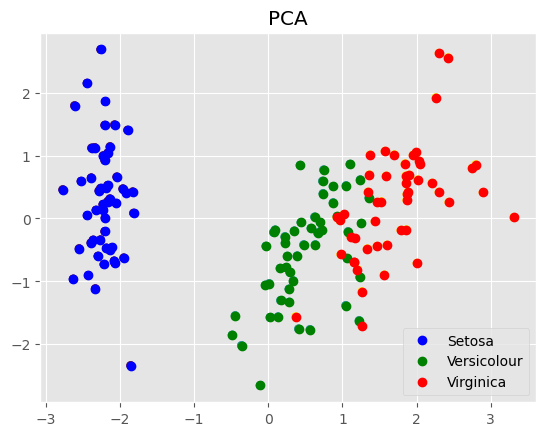

In [25]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=y);
plt.title('PCA')
plt.plot(data_pca2D[y == 0, 0], data_pca2D[y == 0, 1], 'bo', label='Setosa')
plt.plot(data_pca2D[y == 1, 0], data_pca2D[y == 1, 1], 'go', label='Versicolour')
plt.plot(data_pca2D[y == 2, 0], data_pca2D[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

In [28]:
pca = PCA(0.90).fit(scal_data)
print('We need %d components to explain 90%% of variance' 
    % pca.n_components_)

We need 2 components to explain 90% of variance


Метод k-средних

In [29]:
#Импортируем метод KMeans
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering

In [30]:
kmeans = KMeans(n_clusters= 3, random_state=50, 
                max_iter = 100)

In [31]:
kmeans.fit(data_pca2D)
pred_kmeans = kmeans.fit_predict(data_pca2D)

In [32]:
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [33]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [34]:
# а вот ряд с истинными значениями
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

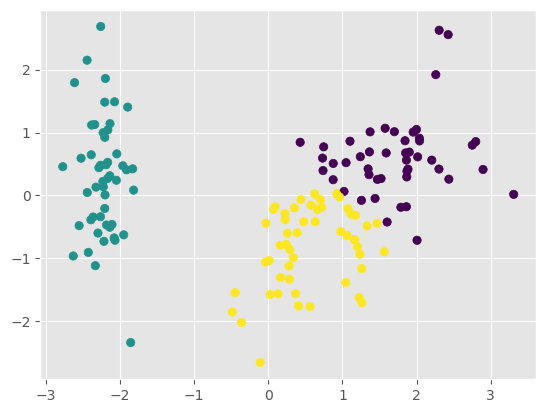

In [35]:
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=pred_kmeans);

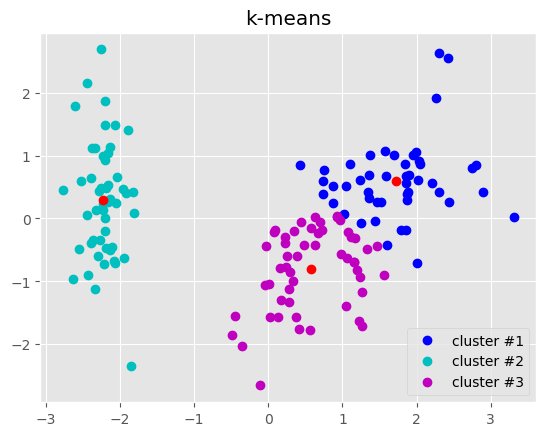

In [36]:
plt.plot(data_pca2D[pred_kmeans ==0,0], data_pca2D[pred_kmeans==0,1], 'bo', label='cluster #1')
plt.plot(data_pca2D[pred_kmeans ==1,0], data_pca2D[pred_kmeans==1,1], 'co', label='cluster #2')
plt.plot(data_pca2D[pred_kmeans == 2,0], data_pca2D[pred_kmeans == 2,1], 'mo', label='cluster #3')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro')
plt.legend(loc=0)
plt.title('k-means');

In [37]:
from sklearn import metrics 

metrics.adjusted_rand_score(y, pred_kmeans)
# или так
#kmeans.fit(data_pca2D) 
#metrics.adjusted_rand_score(y, kmeans.labels_)

0.6201351808870379

# digits: 10; # samples: 1797; # features 64
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


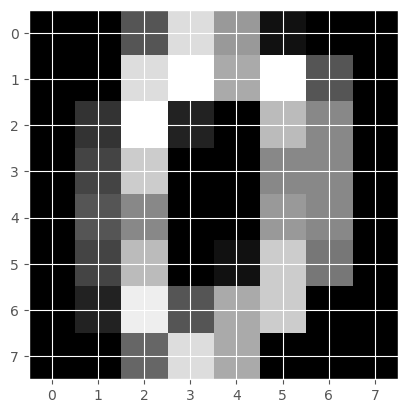

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# в X разместим картинки 8x8, а в y - фактические значения
data = load_digits()#return_X_y=True)
X, y = data.data, data.target
(n_samples, n_features), n_digits = X.shape, np.unique(y).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)
plt.imshow(data.images[0], cmap="gray")#data.images
#plt.matshow(data.images[0])

print(X[0])

In [39]:
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering

df_digit =pd.DataFrame(X)

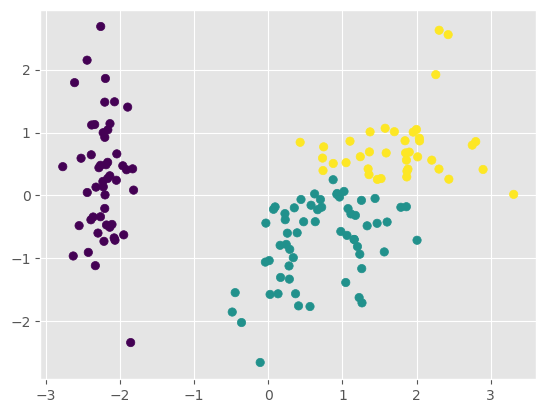

In [40]:
aggCl = AgglomerativeClustering(n_clusters= 3)

aggCl.fit(data_pca2D)
pred_agCl = aggCl.fit_predict(data_pca2D)
plt.scatter(data_pca2D[:,0], data_pca2D[:,1], c=pred_agCl);

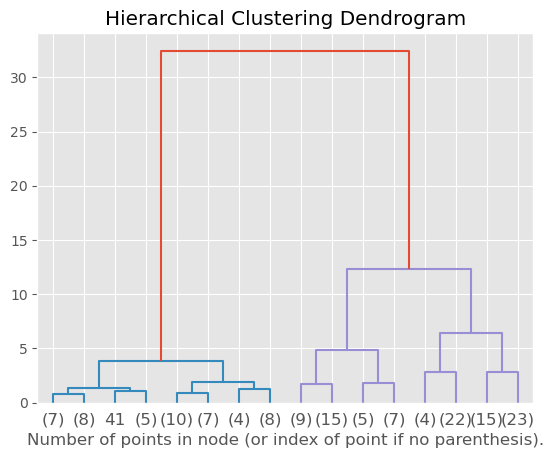

In [41]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()